In [146]:
import pandas as pd
import numpy as np

In [147]:
df = pd.read_csv('Tweets_cleaned_data.csv')
df.sample(5)

,target,id,date,flag,user,text,text2,text3,hashtags,tokens,tokens_remove_stopwords,length_1
878981,4,1685347974,Sun May 03 00:00:31 PDT 2009,NO_QUERY,spazztasticamy,@_chloe goodnight chloe! i think i'm going so...,goodnight chloe i think im going soon too,i think going soon too,NaN,"['i', 'think', 'going', 'soon', 'too']","['think', 'going', 'soon']",3
200945,0,1971785235,Sat May 30 07:53:37 PDT 2009,NO_QUERY,Erika_is_crazy,not liking the movie at all... don't get it...,not liking the movie at all dont get it,not liking the movie at all dont get it,NaN,"['not', 'liking', 'the', 'movie', 'at', 'all',...","['liking', 'movie', 'dont', 'get']",4
51749,0,1679131992,Sat May 02 08:36:44 PDT 2009,NO_QUERY,feefeenah,@uk_joedan_fan yep! but i didn't try when i go...,yep but i didnt try when i got the new version...,yep but i didnt try when i got the new version...,NaN,"['yep', 'but', 'i', 'didnt', 'try', 'when', 'i...","['yep', 'didnt', 'try', 'got', 'new', 'version...",7
320245,0,2003252381,Tue Jun 02 06:11:00 PDT 2009,NO_QUERY,emma_rey,http://twitpic.com/6gmvk - looks like were hap...,looks like were happy doesnt it doesnt show ho...,like were happy doesnt it doesnt show how we a...,NaN,"['like', 'were', 'happy', 'doesnt', 'it', 'doe...","['like', 'happy', 'doesnt', 'doesnt', 'show', ...",9
1563904,4,2187176776,Mon Jun 15 19:54:12 PDT 2009,NO_QUERY,mean_eddie_g,watcing mallrats and listening to dutch shop f...,watcing mallrats and listening to dutch shop f...,and listening to dutch shop for stay tuned pizza,NaN,"['and', 'listening', 'to', 'dutch', 'shop', 'f...","['listening', 'dutch', 'shop', 'stay', 'tuned'...",6


In [148]:
import re
def split_hashtag(hashtag):
    return re.findall(r"#(\w+)", hashtag)

df['hashtags'] = df['text'].apply(split_hashtag)

In [149]:
df['hashtags'] = df['hashtags'].apply(lambda x: list(set(x)))

In [150]:
df['hashtags'].apply(lambda x: len(x) > 0).value_counts()

hashtags
False    1564153
True       35847
Name: count, dtype: int64

In [151]:
df['num_hashtags'] = df['hashtags'].apply(lambda x: len(x))

In [152]:
df = df[df.num_hashtags != 0]

In [153]:
#from nltk.tokenize import word_tokenize
#df['date'].apply(word_tokenize)

In [154]:
def split_month(month):
    return re.findall(r"Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec",month)

df['month'] = df['date'].apply(split_month)

In [155]:
df.sample(20)

,target,id,date,flag,user,text,text2,text3,hashtags,tokens,tokens_remove_stopwords,length_1,num_hashtags,month
869097,4,1678070242,Sat May 02 05:22:01 PDT 2009,NO_QUERY,MyAppleStuff,berbatov is actually tracking back and tacklin...,berbatov is actually tracking back and tacklin...,is actually back and tackling maybe they have ...,[mu],"['is', 'actually', 'back', 'and', 'tackling', ...","['actually', 'back', 'tackling', 'maybe', 'word']",5,1,[May]
931438,4,1770811372,Mon May 11 22:18:48 PDT 2009,NO_QUERY,therealsecret,@cortnee4christ #gratitude &amp; #love your way,amp your way,your way,"[gratitude, love]","['your', 'way']",['way'],1,2,[May]
1072017,4,1966467406,Fri May 29 17:49:16 PDT 2009,NO_QUERY,prmaria,@stacykinney thanks so much for the #followfri...,thanks so much for the love have a great weekend,thanks so much for the love have a great weekend,[followfriday],"['thanks', 'so', 'much', 'for', 'the', 'love',...","['thanks', 'much', 'love', 'great', 'weekend']",5,1,[May]
1217087,4,1989702627,Mon Jun 01 02:30:20 PDT 2009,NO_QUERY,derWebworker,@wpseo lol nice #twitter #icons #free,lol nice,nice,"[icons, twitter, free]",['nice'],['nice'],1,3,[Jun]
190222,0,1969313697,Fri May 29 23:38:56 PDT 2009,NO_QUERY,flyinfoxymama,jay leno's last night on the tonight show #t...,jay lenos last night on the tonight show,jay last night on the tonight show,[tonightshow],"['jay', 'last', 'night', 'on', 'the', 'tonight...","['jay', 'last', 'night', 'tonight', 'show']",5,1,[May]
1399826,4,2054292691,Sat Jun 06 07:01:39 PDT 2009,NO_QUERY,TaranJo,"had a lot of fun at #stl artdtour, saw a lot o...",had a lot of fun at artdtour saw a lot of smil...,had a lot of fun at saw a lot of from of a gif...,[stl],"['had', 'a', 'lot', 'of', 'fun', 'at', 'saw', ...","['lot', 'fun', 'saw', 'lot', 'gift', 'box', 't...",7,1,[Jun]
765643,0,2299536794,Tue Jun 23 13:02:23 PDT 2009,NO_QUERY,StayGolden13,where are my #awesomeclub members?! ( @william...,where are my members omg we havent had a meeti...,where are my we havent had a meeting in forever,[awesomeclub],"['where', 'are', 'my', 'we', 'havent', 'had', ...","['havent', 'meeting', 'forever']",3,1,[Jun]
1106875,4,1971496482,Sat May 30 07:14:50 PDT 2009,NO_QUERY,smart_kookie,buster keaton and gene kelly #myweakness,buster keaton and gene kelly,buster and gene kelly,[myweakness],"['buster', 'and', 'gene', 'kelly']","['buster', 'gene', 'kelly']",3,1,[May]
982058,4,1834168243,Mon May 18 01:53:32 PDT 2009,NO_QUERY,freecloud,@deejackson spot on - it is indeed absolutely ...,spot on it is indeed absolutely cheesy and app...,spot on it is indeed absolutely cheesy and app...,[eurovision],"['spot', 'on', 'it', 'is', 'indeed', 'absolute...","['spot', 'indeed', 'absolutely', 'cheesy', 'ap...",8,1,[May]
361513,0,2046949319,Fri Jun 05 12:55:51 PDT 2009,NO_QUERY,rlangdon,"@wilsonva i didn't bring my passport, so i can...",i didnt bring my passport so i cant do the usa...,i didnt bring my passport so i cant do the stu...,[fova],"['i', 'didnt', 'bring', 'my', 'passport', 'so'...","['didnt', 'bring', 'passport', 'cant', 'stuff'...",8,1,[Jun]


In [156]:
#from collections import Counter
#hashtag_counts = Counter(df['hashtags'])

#df.groupby('year')['hashtags'].apply(pd.DataFrame(hashtag_counts.most_common(len(hashtag_counts))))

#df.groupby(['year']).sum(df['hashtags']).plot(kind='pie', y='points')

df2 = pd.DataFrame().assign(month=df['month'], hashtags=df['hashtags'])
df2


,month,hashtags
83,[Apr],[itm]
175,[Apr],[therapyfail]
190,[Apr],[fb]
193,[Apr],"[24, ttsc]"
331,[Apr],[gayforpeavy]
...,...,...
1599937,[Jun],[eric]
1599952,[Jun],[traveltuesday]
1599985,[Jun],"[music, haveyouever]"
1599988,[Jun],[bigrun]


In [157]:
df2['month'] = df2['month'].agg(lambda x: ','.join(map(str, x)))

In [158]:
df2

,month,hashtags
83,Apr,[itm]
175,Apr,[therapyfail]
190,Apr,[fb]
193,Apr,"[24, ttsc]"
331,Apr,[gayforpeavy]
...,...,...
1599937,Jun,[eric]
1599952,Jun,[traveltuesday]
1599985,Jun,"[music, haveyouever]"
1599988,Jun,[bigrun]


In [159]:
df3 = df2.loc[df2['month'] == 'Apr']
df3

,month,hashtags
83,Apr,[itm]
175,Apr,[therapyfail]
190,Apr,[fb]
193,Apr,"[24, ttsc]"
331,Apr,[gayforpeavy]
...,...,...
858279,Apr,[photography]
858312,Apr,[openspacecode]
858314,Apr,[13]
858326,Apr,[gknr]


In [160]:
hashtags = np.array([hashtag for hashtag_list in df3['hashtags'][pd.notnull(df['hashtags'])] for hashtag in hashtag_list])

hashtags

array(['itm', 'therapyfail', 'fb', ..., '13', 'gknr', '2'], dtype='<U45')

In [161]:
len(hashtags)

2123

In [162]:
# count the number of each hashtag
from collections import Counter
hashtag_counts = Counter(hashtags)

In [163]:
#hashtag_df = pd.DataFrame(hashtag_counts.most_common(len(hashtag_counts)), columns=['hashtag', 'count'])
hashtag_df = pd.DataFrame(hashtag_counts.most_common(20), columns=['hashtag', 'count'])
hashtag_df

,hashtag,count
0,asot400,331
1,f1,76
2,fb,73
3,followfriday,39
4,1,34
5,readathon,26
6,ipl,22
7,tweetie,22
8,fail,18
9,pussycatisland,18


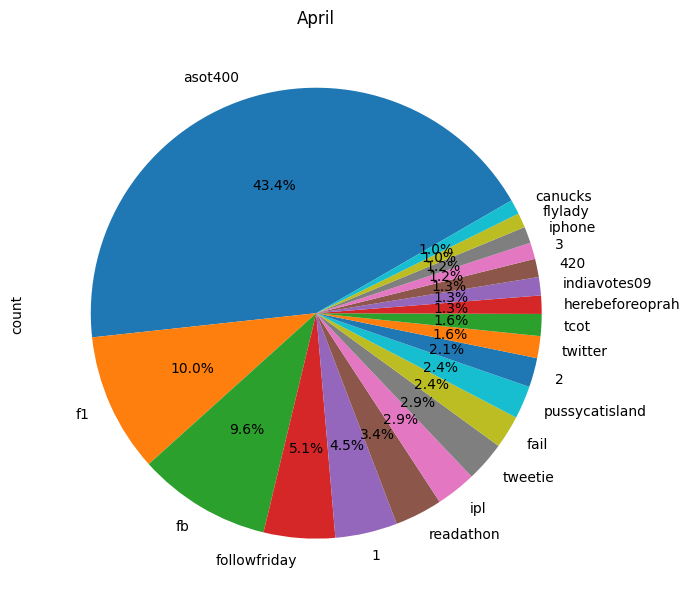

In [164]:
import matplotlib.pyplot as plt
#from pandas.tools.plotting import table

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
hashtag_df.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=30, shadow=False, labels=hashtag_df['hashtag'], legend = False, fontsize=10)

plt.title('April')
plt.show()

In [165]:
df3 = df2.loc[df2['month'] == 'May']
df3

,month,hashtags
41713,May,[mariners]
41724,May,[kentuckyderby]
41851,May,[odna]
42098,May,[tweetjack]
42100,May,[nascar]
...,...,...
1209815,May,"[killmenow, s2istheworst4chaptertextbookever, ..."
1209838,May,"[conan, e3]"
1209900,May,[makerfaire]
1209913,May,[yorly]


In [166]:
hashtags = np.array([hashtag for hashtag_list in df3['hashtags'][pd.notnull(df['hashtags'])] for hashtag in hashtag_list])

hashtags

array(['mariners', 'kentuckyderby', 'odna', ..., 'makerfaire', 'yorly',
       'ihate'], dtype='<U117')

In [167]:
len(hashtags)

15715

In [168]:
# count the number of each hashtag
from collections import Counter
hashtag_counts = Counter(hashtags)

In [169]:
#hashtag_df = pd.DataFrame(hashtag_counts.most_common(len(hashtag_counts)), columns=['hashtag', 'count'])
hashtag_df = pd.DataFrame(hashtag_counts.most_common(20), columns=['hashtag', 'count'])
hashtag_df

,hashtag,count
0,followfriday,1809
1,fb,565
2,ff,537
3,myweakness,269
4,bgt,240
5,1,187
6,2,134
7,andyhurleyday,131
8,fail,115
9,marsiscoming,105


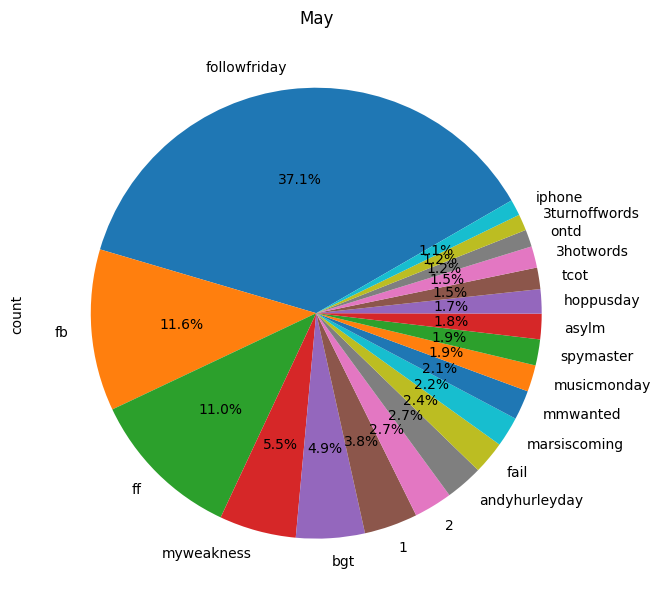

In [170]:
import matplotlib.pyplot as plt
#from pandas.tools.plotting import table

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
hashtag_df.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=30, shadow=False, labels=hashtag_df['hashtag'], legend = False, fontsize=10)

plt.title('May')
plt.show()

In [171]:
df3 = df2.loc[df2['month'] == 'Jun']
df3

,month,hashtags
266529,Jun,[tfe]
266577,Jun,"[boston, brooklyn]"
266690,Jun,[threadless]
266708,Jun,[spymaster]
266752,Jun,[hothothot]
...,...,...
1599937,Jun,[eric]
1599952,Jun,[traveltuesday]
1599985,Jun,"[music, haveyouever]"
1599988,Jun,[bigrun]


In [172]:
hashtags = np.array([hashtag for hashtag_list in df3['hashtags'][pd.notnull(df['hashtags'])] for hashtag in hashtag_list])

hashtags

array(['tfe', 'boston', 'brooklyn', ..., 'haveyouever', 'bigrun',
       'charitytuesday'], dtype='<U55')

In [173]:
len(hashtags)

23387

In [174]:
# count the number of each hashtag
from collections import Counter
hashtag_counts = Counter(hashtags)

In [175]:
#hashtag_df = pd.DataFrame(hashtag_counts.most_common(len(hashtag_counts)), columns=['hashtag', 'count'])
hashtag_df = pd.DataFrame(hashtag_counts.most_common(20), columns=['hashtag', 'count'])
hashtag_df

,hashtag,count
0,fb,1148
1,squarespace,922
2,followfriday,772
3,iranelection,516
4,ff,433
5,musicmonday,320
6,iremember,296
7,1,295
8,iphone,252
9,e3,246


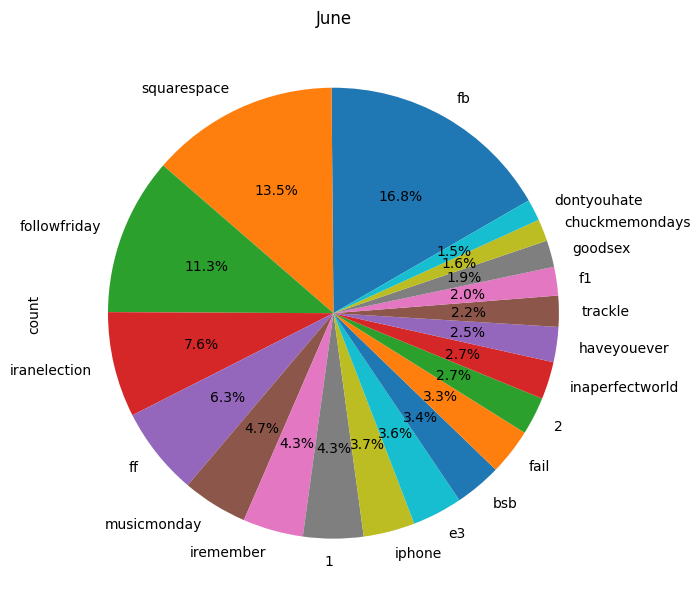

In [176]:
import matplotlib.pyplot as plt
#from pandas.tools.plotting import table

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
hashtag_df.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=30, shadow=False, labels=hashtag_df['hashtag'], legend = False, fontsize=10)

plt.title('June')
plt.show()